In [159]:
import numpy as np
import pandas as pd

In [160]:
#read the data
data= pd.read_csv("footballPlayer.csv")

In [161]:
data

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1.0,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1.0,England,0,1,20,0,1


In [162]:
output_variable = 'market_value'

# Data Exploration

In [163]:
X = data[data.columns[~data.columns.isin([output_variable])]]
y = data[[output_variable]]

In [164]:
df = pd.concat([X,y],axis=1)
df

,name,club,age,position,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,market_value
0,Alexis Sanchez,Arsenal,28,LW,1,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0,65.0
1,Mesut Ozil,Arsenal,28,AM,1,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0,50.0
2,Petr Cech,Arsenal,35,GK,4,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0,7.0
3,Theo Walcott,Arsenal,28,RW,1,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0,20.0
4,Laurent Koscielny,Arsenal,31,CB,3,912,6.0,0.70%,121,2.0,France,0,4,1,1,0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,2,288,4.5,0.40%,38,2.0,Switzerland,0,1,20,0,1,5.0
457,Arthur Masuaku,West+Ham,23,LB,3,199,4.5,0.20%,34,4.0,Congo DR,0,2,20,0,1,7.0
458,Sam Byram,West+Ham,23,RB,3,198,4.5,0.30%,29,1.0,England,0,2,20,0,0,4.5
459,Ashley Fletcher,West+Ham,21,CF,1,412,4.5,5.90%,16,1.0,England,0,1,20,0,1,1.0


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   page_views    461 non-null    int64  
 6   fpl_value     461 non-null    float64
 7   fpl_sel       461 non-null    object 
 8   fpl_points    461 non-null    int64  
 9   region        460 non-null    float64
 10  nationality   461 non-null    object 
 11  new_foreign   461 non-null    int64  
 12  age_cat       461 non-null    int64  
 13  club_id       461 non-null    int64  
 14  big_club      461 non-null    int64  
 15  new_signing   461 non-null    int64  
 16  market_value  461 non-null    float64
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [166]:
# Here we can see, only one column has one null value.
# So here we can assign the maximum occurance of region in null value

In [167]:
df.region.value_counts().sort_values(ascending=False)

2.0    207
1.0    156
4.0     56
3.0     41
Name: region, dtype: int64

In [168]:
#So here we can assign the 2.0 for null value in region column
#row_with_NaN['region']=2.0
#row_with_NaN.iloc['region'] = 2.0
df['region'] = df['region'].fillna(2.0)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   page_views    461 non-null    int64  
 6   fpl_value     461 non-null    float64
 7   fpl_sel       461 non-null    object 
 8   fpl_points    461 non-null    int64  
 9   region        461 non-null    float64
 10  nationality   461 non-null    object 
 11  new_foreign   461 non-null    int64  
 12  age_cat       461 non-null    int64  
 13  club_id       461 non-null    int64  
 14  big_club      461 non-null    int64  
 15  new_signing   461 non-null    int64  
 16  market_value  461 non-null    float64
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [170]:
temp_df = df.copy()

In [171]:
## add position category for each respective player
def addPosCat(inputCat):

    if inputCat == 1:
        return('Attackers')
    elif inputCat == 2:
        return('Midfielders')
    elif inputCat == 3:
        return('Defenders')
    else:
        return('Goalkeeper')

temp_df['position_cat'] = temp_df['position_cat'].apply(addPosCat)

In [172]:
## add region for each player from they are belongs
def addRegion(inpregion):
    
    if inpregion == 1:
        return('England')
    elif inpregion == 2:
        return('EU')
    elif inpregion == 3:
        return('Americans')
    else:
        return('Rest of World')

temp_df['region'] = temp_df['region'].apply(addRegion)

In [173]:
temp_df.head()

,name,club,age,position,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,market_value
0,Alexis Sanchez,Arsenal,28,LW,Attackers,4329,12.0,17.10%,264,Americans,Chile,0,4,1,1,0,65.0
1,Mesut Ozil,Arsenal,28,AM,Attackers,4395,9.5,5.60%,167,EU,Germany,0,4,1,1,0,50.0
2,Petr Cech,Arsenal,35,GK,Goalkeeper,1529,5.5,5.90%,134,EU,Czech Republic,0,6,1,1,0,7.0
3,Theo Walcott,Arsenal,28,RW,Attackers,2393,7.5,1.50%,122,England,England,0,4,1,1,0,20.0
4,Laurent Koscielny,Arsenal,31,CB,Defenders,912,6.0,0.70%,121,EU,France,0,4,1,1,0,22.0


In [174]:
temp_df[['age_cat','age']].corr()

,age_cat,age
age_cat,1.000000,0.972199
age,0.972199,1.000000


age_cat is highly correlated with age

In [175]:
def retrieveAgeCategories(temp_data):
    int_age_categories = sorted(temp_data['age_cat'].unique())
    age_categories = {}
    for i in int_age_categories:
        records = (temp_data[temp_data['age_cat'] == i])
        age_categories[i] = str(min(records['age'])) + "-" + str(max(records['age']))
    return age_categories

age_categories = retrieveAgeCategories(temp_df)
age_categories

{1: '17-21', 2: '22-24', 3: '25-27', 4: '28-31', 5: '32-33', 6: '34-38'}

In [176]:
def age_cat_convert(inp_age_cat, age_categories):
    return age_categories[inp_age_cat]

temp_df['age_cat'] = temp_df['age_cat'].apply(age_cat_convert, args=(age_categories,))

In [177]:
temp_df.head()

,name,club,age,position,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,market_value
0,Alexis Sanchez,Arsenal,28,LW,Attackers,4329,12.0,17.10%,264,Americans,Chile,0,28-31,1,1,0,65.0
1,Mesut Ozil,Arsenal,28,AM,Attackers,4395,9.5,5.60%,167,EU,Germany,0,28-31,1,1,0,50.0
2,Petr Cech,Arsenal,35,GK,Goalkeeper,1529,5.5,5.90%,134,EU,Czech Republic,0,34-38,1,1,0,7.0
3,Theo Walcott,Arsenal,28,RW,Attackers,2393,7.5,1.50%,122,England,England,0,28-31,1,1,0,20.0
4,Laurent Koscielny,Arsenal,31,CB,Defenders,912,6.0,0.70%,121,EU,France,0,28-31,1,1,0,22.0


In [178]:
#count the unique label name for all columns 
for col in temp_df.columns:
    print(col, ': ', len(temp_df[col].unique()), ' labels')

name :  461  labels
club :  20  labels
age :  22  labels
position :  13  labels
position_cat :  4  labels
page_views :  389  labels
fpl_value :  17  labels
fpl_sel :  113  labels
fpl_points :  153  labels
region :  4  labels
nationality :  61  labels
new_foreign :  2  labels
age_cat :  6  labels
club_id :  20  labels
big_club :  2  labels
new_signing :  2  labels
market_value :  48  labels


# Numerical varibles

In [179]:
# list of numerical variables
numerical_features = [feature for feature in temp_df.columns if temp_df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
temp_df[numerical_features].head()

Number of numerical variables:  9


,age,page_views,fpl_value,fpl_points,new_foreign,club_id,big_club,new_signing,market_value
0,28,4329,12.0,264,0,1,1,0,65.0
1,28,4395,9.5,167,0,1,1,0,50.0
2,35,1529,5.5,134,0,1,1,0,7.0
3,28,2393,7.5,122,0,1,1,0,20.0
4,31,912,6.0,121,0,1,1,0,22.0


In [180]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(temp_df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 6


In [181]:
discrete_feature

['age', 'fpl_value', 'new_foreign', 'club_id', 'big_club', 'new_signing']

In [182]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

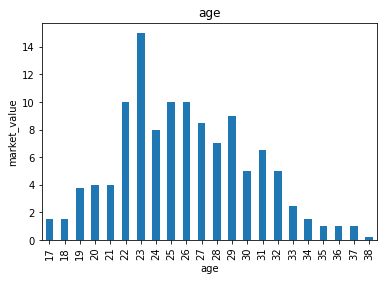

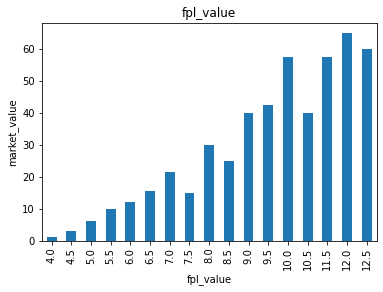

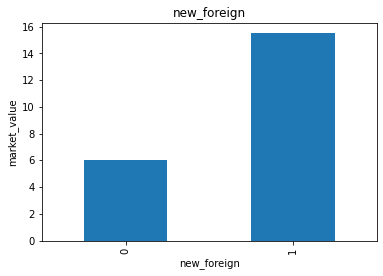

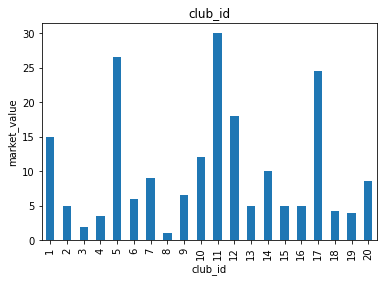

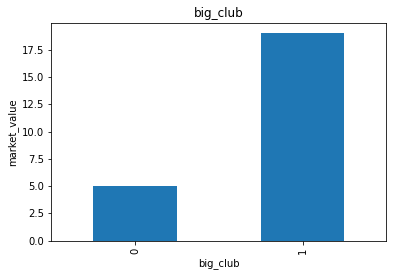

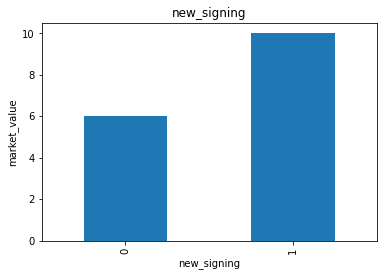

In [183]:
## Lets Find the realtionship between them and market_value

for feature in discrete_feature:
    temp_data =data.copy()
    temp_data.groupby(feature)['market_value'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('market_value')
    plt.title(feature)
    plt.show()

In [184]:
temp_df['club'].unique()

array(['Arsenal', 'Bournemouth', 'Brighton+and+Hove', 'Burnley',
       'Chelsea', 'Crystal+Palace', 'Everton', 'Huddersfield',
       'Leicester+City', 'Liverpool', 'Manchester+City',
       'Manchester+United', 'Newcastle+United', 'Southampton',
       'Stoke+City', 'Swansea', 'Tottenham', 'Watford', 'West+Brom',
       'West+Ham'], dtype=object)

In [185]:
len(temp_df['club'].unique())

20

In [186]:
temp_df['club_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

In [187]:
len(temp_df['club'].unique())

20

#### Conclusion
i) new_signing, new_foreign, big_club are binary variables<br>
ii) 'age', 'fpl_value', 'new_foreign', 'club_id', 'big_club', 'new_signing' are discrete numeric variables<br>

### Continues Variables

In [188]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 3


In [189]:
continuous_feature

['page_views', 'fpl_points', 'market_value']

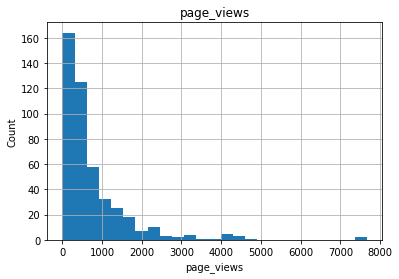

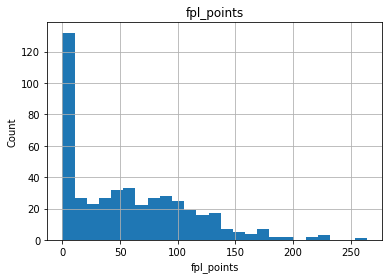

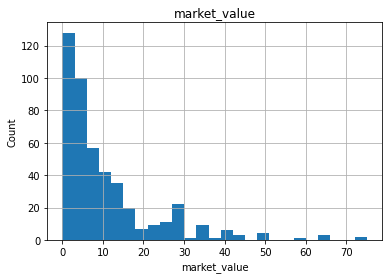

In [190]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data_temp=data.copy()
    data_temp[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [191]:
corr = temp_df.corr()
corr

,age,page_views,fpl_value,fpl_points,new_foreign,club_id,big_club,new_signing,market_value
age,1.000000,-0.048682,-0.097659,0.187785,-0.125400,-0.002868,-0.123566,-0.079190,-0.132396
page_views,-0.048682,1.000000,0.730640,0.542464,-0.049725,-0.092409,0.502982,0.127249,0.739657
fpl_value,-0.097659,0.730640,1.000000,0.618837,0.108650,-0.060884,0.423556,0.098314,0.788653
fpl_points,0.187785,0.542464,0.618837,1.000000,-0.204837,0.041094,0.280061,0.085720,0.615155
new_foreign,-0.125400,-0.049725,0.108650,-0.204837,1.000000,-0.002786,0.080949,-0.078193,0.098056
club_id,-0.002868,-0.092409,-0.060884,0.041094,-0.002786,1.000000,-0.155667,0.134085,-0.046068
big_club,-0.123566,0.502982,0.423556,0.280061,0.080949,-0.155667,1.000000,0.035508,0.593483
new_signing,-0.079190,0.127249,0.098314,0.085720,-0.078193,0.134085,0.035508,1.000000,0.131321
market_value,-0.132396,0.739657,0.788653,0.615155,0.098056,-0.046068,0.593483,0.131321,1.000000


In [192]:
corr['market_value'].sort_values()

age            -0.132396
club_id        -0.046068
new_foreign     0.098056
new_signing     0.131321
big_club        0.593483
fpl_points      0.615155
page_views      0.739657
fpl_value       0.788653
market_value    1.000000
Name: market_value, dtype: float64

<AxesSubplot:>

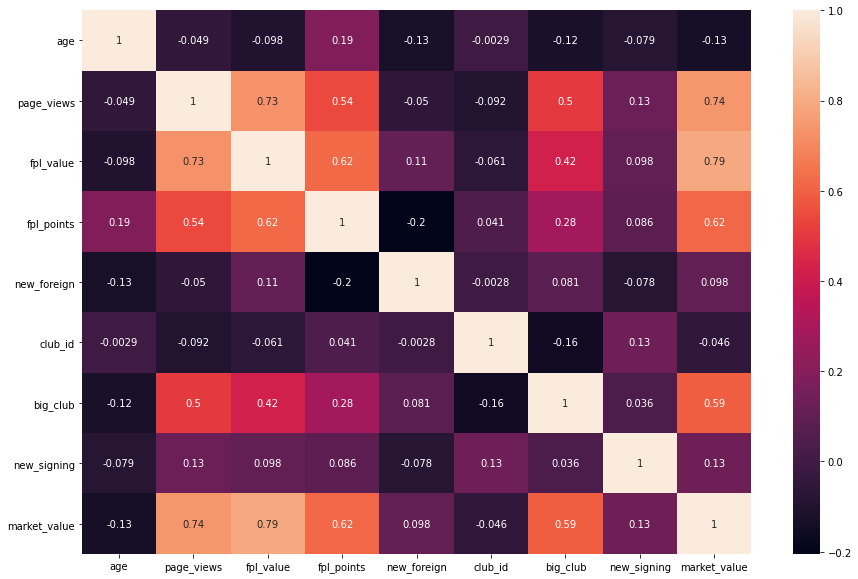

In [193]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot = True)

### Conclusion
i) 'page_views', 'fpl_points', 'market_value' are continues numeric variables<br>
ii) fpl_value, page_views, fpl_points, big_club, fpl_sel are highly correlated to the market_value

In [194]:
# name is not important for pridiction point of view
# club_id and club represents same thing. 
# So let's drop club_id columns and name
temp_df.drop(['name','club_id'],axis=1,inplace=True)

## Catgorical Features

In [196]:
categorical_features=[feature for feature in temp_df.columns if temp_df[feature].dtypes=='O']
categorical_features

['club',
 'position',
 'position_cat',
 'fpl_sel',
 'region',
 'nationality',
 'age_cat']

In [197]:
data[categorical_features].head()

,club,position,position_cat,fpl_sel,region,nationality,age_cat
0,Arsenal,LW,1,17.10%,3.0,Chile,4
1,Arsenal,AM,1,5.60%,2.0,Germany,4
2,Arsenal,GK,4,5.90%,2.0,Czech Republic,6
3,Arsenal,RW,1,1.50%,1.0,England,4
4,Arsenal,CB,3,0.70%,2.0,France,4


In [198]:
# fpl_sel represents % of FPL players who have selected that player in their team. It is given as of string datatype.
# Converting fpl selection into numeric variable 

temp_df['fpl_sel'] = temp_df['fpl_sel'].map(lambda x: str(x)[:-1]).astype('float')/100
temp_df.head() 

,club,age,position,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,big_club,new_signing,market_value
0,Arsenal,28,LW,Attackers,4329,12.0,0.171,264,Americans,Chile,0,28-31,1,0,65.0
1,Arsenal,28,AM,Attackers,4395,9.5,0.056,167,EU,Germany,0,28-31,1,0,50.0
2,Arsenal,35,GK,Goalkeeper,1529,5.5,0.059,134,EU,Czech Republic,0,34-38,1,0,7.0
3,Arsenal,28,RW,Attackers,2393,7.5,0.015,122,England,England,0,28-31,1,0,20.0
4,Arsenal,31,CB,Defenders,912,6.0,0.007,121,EU,France,0,28-31,1,0,22.0


In [201]:
categorical_features=[feature for feature in temp_df.columns if temp_df[feature].dtypes=='O']
categorical_features

['club', 'position', 'position_cat', 'region', 'nationality', 'age_cat']

In [202]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is club and number of categories are 20
The feature is position and number of categories are 13
The feature is position_cat and number of categories are 4
The feature is region and number of categories are 5
The feature is nationality and number of categories are 61
The feature is age_cat and number of categories are 6


## Find out the relationship between categorical variable and dependent feature SalesPrice

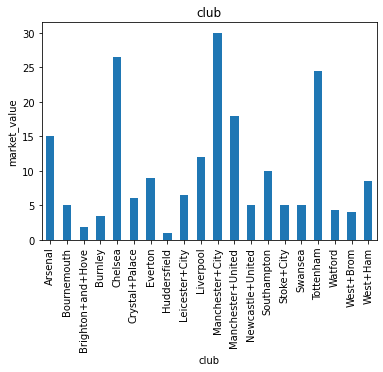

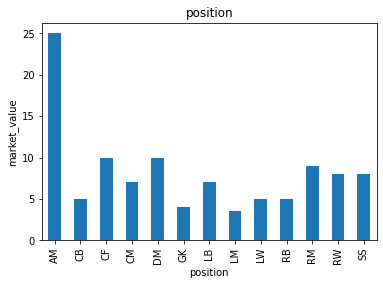

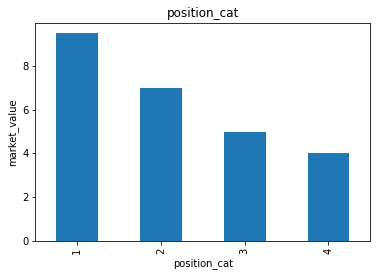

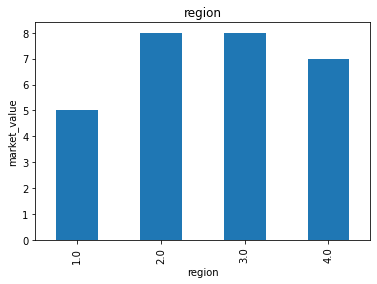

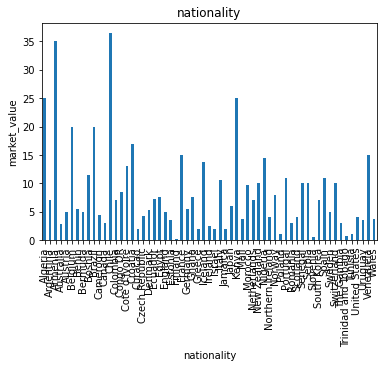

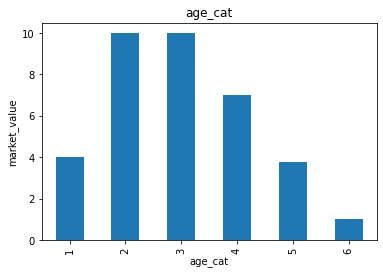

In [203]:
for feature in categorical_features:
    data_temp=data.copy()
    data_temp.groupby(feature)['market_value'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('market_value')
    plt.title(feature)
    plt.show()

In [205]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [206]:
sns.set(font_scale=1.5)

<AxesSubplot:xlabel='age_cat', ylabel='market_value'>

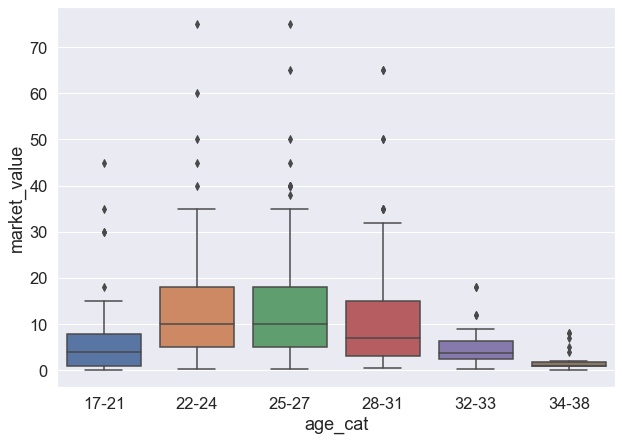

In [207]:
plt.figure(figsize=(10, 7)) 
sns.boxplot(x = 'age_cat', y = "market_value", data = temp_df, order = list(age_categories.values()))

<AxesSubplot:xlabel='region', ylabel='market_value'>

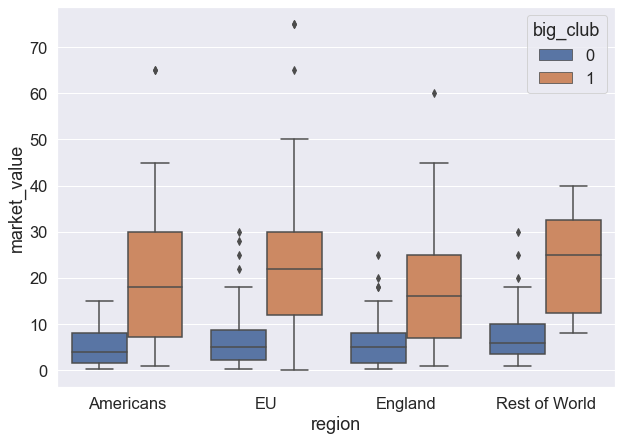

In [208]:
plt.figure(figsize=(10, 7)) 
sns.boxplot(x = 'region', y = "market_value", hue = 'big_club', data = temp_df)

<AxesSubplot:xlabel='position_cat', ylabel='market_value'>

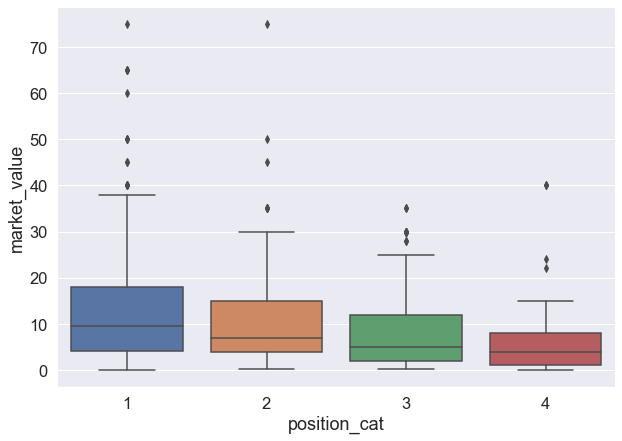

In [210]:
plt.figure(figsize=(10, 7)) 
sns.boxplot(x = 'position_cat', y = "market_value", data = temp_data)

<AxesSubplot:xlabel='market_value', ylabel='club'>

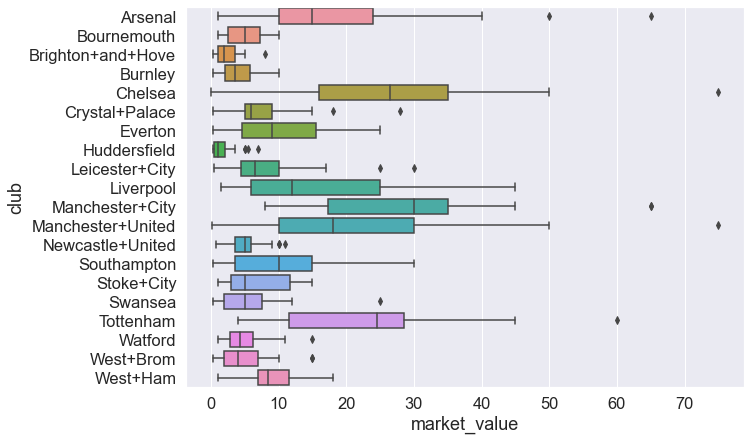

In [211]:
#club wise market_price
plt.figure(figsize=(10, 7)) 
sns.boxplot(x="market_value", y="club", data=df)

We can see certain clubs like Chelsea, Manchester+ United, Tottenham pay big amounts to the players

<AxesSubplot:xlabel='big_club', ylabel='market_value'>

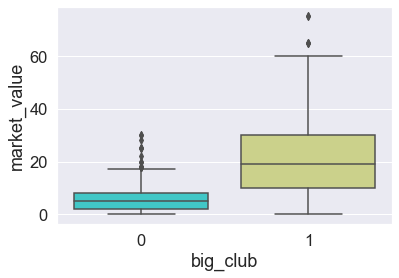

In [212]:
sns.boxplot(x="big_club", y="market_value", data=temp_data, palette='rainbow')

<AxesSubplot:xlabel='new_signing', ylabel='market_value'>

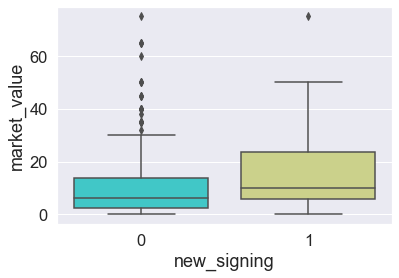

In [213]:
sns.boxplot(x="new_signing", y="market_value", data=temp_data, palette='rainbow')

<AxesSubplot:xlabel='new_foreign', ylabel='market_value'>

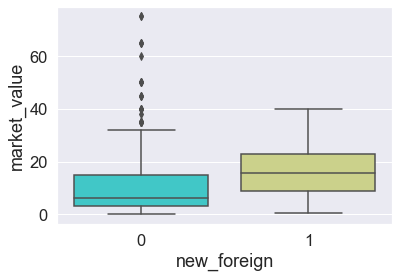

In [214]:
sns.boxplot(x="new_foreign", y="market_value", data=temp_data, palette='rainbow')

<AxesSubplot:xlabel='position', ylabel='market_value'>

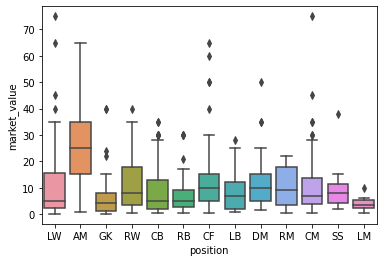

In [280]:
sns.boxplot(x="position", y="market_value", data=df)

<AxesSubplot:xlabel='market_value', ylabel='nationality'>

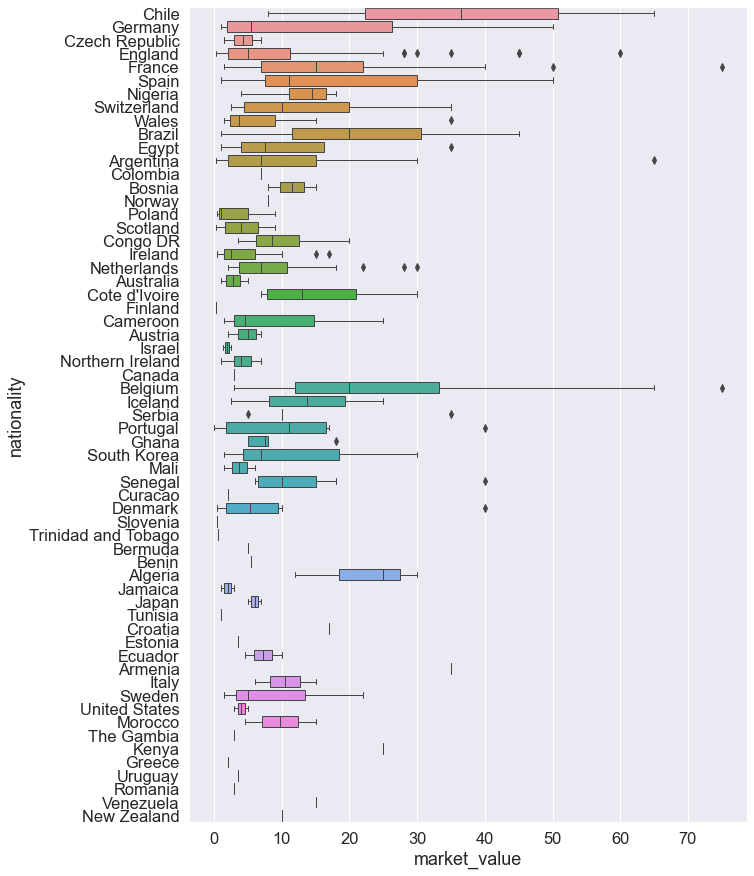

In [217]:
plt.figure(figsize=(10, 15)) 
sns.boxplot(x="market_value", y="nationality", data=df,width=0.8,linewidth=1)

Country like Chile, Belgium, spain brazil players get high amount